# Importing Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import importlib
from sklearn.model_selection import train_test_split
import natsort

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 50)
pd.options.mode.chained_assignment = None  # default='warn'
sns.set_style("darkgrid")

In [2]:
import sys
# This allows us to import the nucml utilities
sys.path.append("..")

In [3]:
import nucml.exfor.data_utilities as exfor_utils
import nucml.exfor.plotting_utilities as exfor_plot
import nucml.endf.data_utilities as endf_utils
import nucml.plot.plotting_utilities as plot_utils
import nucml.datasets as nuc_data
importlib.reload(exfor_utils)
importlib.reload(exfor_plot)
importlib.reload(endf_utils)
importlib.reload(plot_utils)
importlib.reload(nuc_data)
print("Finish importing scripts.")

Finish importing scripts.


# Loading EXFOR data

In [4]:
# df = nuc_data.load_exfor(basic=True)
df, x_train, x_test, y_train, y_test, to_scale, scaler = nuc_data.load_exfor(log=True, basic=True, num=True, low_en=True)

C:\Users\Pedro\Desktop\ML_Nuclear_Data\ML_Data\EXFOR_neutrons\EXFOR_neutrons_MF3_AME_no_NaNRaw.csv
Reading data into dataframe...
 MODE: neutrons
 LOW ENERGY: True
 LOG: True
 BASIC: True
Data read into dataframe with shape:  (4184245, 10)
Dropping unnecessary features and one-hot encoding categorical columns...
Splitting dataset into training and testing...
Normalizing dataset...
Finished. Resulting dataset has shape  (4184245, 49) 
Training and Testing dataset shapes are (3765820, 48) and (418425, 48) respesctively.


# Sampling Chlorine (n,p) and U-233(n,f) Data for Visualization

The model will be trained in the entire data therefore getting the total MSE. As an example, we will see the model predictions for both the mentioned reactions. 

In [5]:
kwargs = {"nat_iso": "I", "one_hot": True, "scale": True, "scaler": scaler, "to_scale": to_scale}

chlorine_35_np = exfor_utils.load_exfor_samples(df, 17, 35, "MT_103", **kwargs)
uranium_235_nt = exfor_utils.load_exfor_samples(df, 92, 235, "MT_1", **kwargs)
uranium_233_nf = exfor_utils.load_exfor_samples(df, 92, 233, "MT_18", **kwargs)
uranium_233_nt = exfor_utils.load_exfor_samples(df, 92, 233, "MT_1", one_hot=True)

Extracting samples from dataframe.
Scaling dataset...
EXFOR extracted DataFrame has shape:  (215, 49)
Extracting samples from dataframe.
Scaling dataset...
EXFOR extracted DataFrame has shape:  (40108, 49)
Extracting samples from dataframe.
Scaling dataset...
EXFOR extracted DataFrame has shape:  (94567, 49)
Extracting samples from dataframe.
EXFOR extracted DataFrame has shape:  (33384, 49)


In [6]:
kwargs = {"nat_iso": "I", "one_hot": True, "scale": True, "scaler": scaler, "to_scale": to_scale}
uranium = exfor_utils.load_exfor_element(df, 92, **kwargs)

Extracting samples from dataframe.
Scaling dataset...
EXFOR extracted DataFrame has shape:  (468123, 49)


# Newly Measured Chlorine (n,p) Unseen Data 

These data points are not in the current EXFOR data package and will be used to test the new modeling capabilities.

ENDF = MEV
EXFOR = EV

In [7]:
new_cl_data_kwargs = {"Z":17, "A":35, "MT":"MT_103", "log":True, "scale":False, "scaler":scaler, "to_scale":to_scale}
new_cl_data = exfor_utils.load_exfor_newdata("../EXFOR/New_Data/Chlorine_Data/new_cl_np.csv", df, **new_cl_data_kwargs)
new_cl_data.head()

Extracting samples from dataframe.
EXFOR extracted DataFrame has shape:  (215, 49)
Expanded Dataset has shape:  (12, 49)


,Energy,Data,Target_Protons,Target_Neutrons,Target_Mass_Number,MT_1,MT_102,MT_16,MT_17,MT_2,MT_3,MT_4,MT_101,MT_103,MT_104,MT_41,MT_9000,MT_105,MT_32,MT_51,MT_33,MT_107,MT_24,MT_155,MT_158,MT_159,MT_108,MT_29,MT_1108,MT_113,MT_106,MT_22,MT_1003,MT_9001,MT_28,MT_111,MT_203,MT_2103,MT_112,MT_37,MT_161,MT_152,MT_153,MT_18,MT_160,Frame_L,Frame_C,Target_Flag_I,Target_Flag_N
0,6.383815,-1.779892,17,18,35,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,6.383815,-1.707744,17,18,35,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,6.401401,-1.583359,17,18,35,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,6.401401,-1.590067,17,18,35,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,6.411620,-1.350665,17,18,35,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


# ENDF Evaluation Cross Section Data for Chlorine (n,p) Reaction

These data points will serve to plot the current ENDFb5 data and compare it to the newly measured points along with the predictions

In [8]:
endf_cl = nuc_data.load_endf("Cl035", "MT103", mev_to_ev=True, mb_to_b=True, log=True)
endf_u  = nuc_data.load_endf("U233", "MT018", log=True)
endf_u_nonelastic  = nuc_data.load_endf("U233", "MT003", log=True, mb_to_b=False)

C:\Users\Pedro\Desktop\ML_Nuclear_Data\ML_Data\ENDF_neutrons\Cl035\endfb8.0\tables\xs\n-Cl035-MT103.endfb8.0
Convering MeV to eV...
Convering mb to b...
Finish reading ENDF data with shape:  (8791, 2)
C:\Users\Pedro\Desktop\ML_Nuclear_Data\ML_Data\ENDF_neutrons\U233\endfb8.0\tables\xs\n-U233-MT018.endfb8.0
Convering MeV to eV...
Convering mb to b...
Finish reading ENDF data with shape:  (15345, 2)
C:\Users\Pedro\Desktop\ML_Nuclear_Data\ML_Data\ENDF_neutrons\U233\endfb8.0\tables\xs\n-U233-MT003.endfb8.0
Convering MeV to eV...
Finish reading ENDF data with shape:  (33329, 2)


# Loading Chlorine Data

Extracting samples from dataframe.
EXFOR extracted DataFrame has shape:  (128, 49)


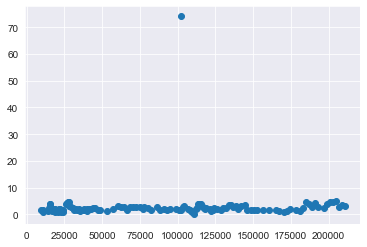

In [6]:
# chlorine_tot = exfor_utils.load_exfor_samples(df, 17, 35, "1", one_hot=False)
chlorine_tot = exfor_utils.load_exfor_samples(df, 17, 35, "MT_1", one_hot=True)

plt.scatter(chlorine_tot.Energy, chlorine_tot.Data)

Extracting samples from dataframe.
EXFOR extracted DataFrame has shape:  (215, 49)


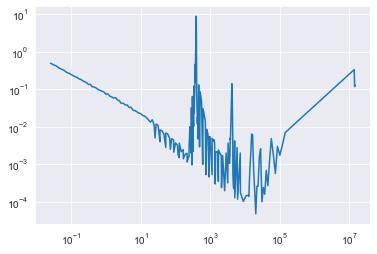

In [8]:
# chlorine_35 = exfor_utils.load_exfor_samples(df, 17, 35, "103", one_hot=False)
chlorine_35 = exfor_utils.load_exfor_samples(df, 17, 35, "MT_103", one_hot=True)

plt.loglog(chlorine_35.Energy, chlorine_35.Data)

In [9]:
# chlorine_35.drop(
#     columns=["Target_Protons", "Frame", "Target_Neutrons", "Target_Mass_Number", "Target_Flag"], 
#     inplace=True)

# chlorine_35["EnergyLog"] = np.log10(chlorine_35["Energy"])
# chlorine_35["DataLog"] = np.log10(chlorine_35["Data"])

# Fitting a Linear Model

In [ ]:
from sklearn.linear_model import LinearRegression

reg_log = LinearRegression().fit(chlorine_35.EnergyLog.values.reshape(-1, 1), 
                             chlorine_35.DataLog.values.reshape(-1, 1))

In [ ]:
plt.plot(chlorine_35.EnergyLog, reg_log.predict(chlorine_35.EnergyLog.values.reshape(-1, 1)))
plt.plot(chlorine_35.EnergyLog, chlorine_35.DataLog)

In [ ]:
reg = LinearRegression().fit(chlorine_35.Energy.values.reshape(-1, 1), 
                             chlorine_35.Data.values.reshape(-1, 1))

In [ ]:
plt.loglog(chlorine_35.Energy, reg.predict(chlorine_35.Energy.values.reshape(-1, 1)))
plt.loglog(chlorine_35.Energy, chlorine_35.Data)

In [ ]:
reg_log_norm = LinearRegression().fit(chlorine_35.EnergyLog.values.reshape(-1, 1), 
                             chlorine_35.Data.values.reshape(-1, 1))

In [ ]:
plt.plot(chlorine_35.EnergyLog, reg_log_norm.predict(chlorine_35.EnergyLog.values.reshape(-1, 1)))
plt.plot(chlorine_35.EnergyLog, chlorine_35.DataLog)

# Loading Uranium Fission Data

In [11]:
uranium_fission = exfor_utils.load_exfor_samples(df, 92, 233, "MT_18", one_hot=True)

Extracting samples from dataframe.
EXFOR extracted DataFrame has shape:  (94567, 49)


In [31]:
uranium_fission["Energy"] = np.log10(uranium_fission["Energy"])
uranium_fission["Data"] = np.log10(uranium_fission["Data"])

In [32]:
# uranium_fission["Data"] = uranium_fission["Data"] / 1E6

In [33]:
uranium_fission[to_scale] = scaler.transform(uranium_fission[to_scale])

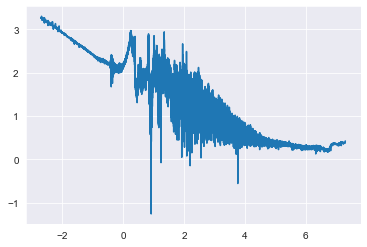

In [34]:
# plt.plot(uranium_fission.Energy, np.log10(uranium_fission.Data))
plt.plot(uranium_fission.Energy, uranium_fission.Data)

# Getting Uranium Data

In [35]:
uranium = exfor_utils.load_exfor_element(df, 92, nat_iso="I", one_hot=True)
chlorine = exfor_utils.load_exfor_element(df, 17, nat_iso="I", one_hot=True)

Extracting samples from dataframe.
EXFOR extracted DataFrame has shape:  (468123, 49)
Extracting samples from dataframe.
EXFOR extracted DataFrame has shape:  (1737, 49)


In [36]:
# uranium["Data"] = uranium["Data"] / 1E6

uranium["Energy"] = np.log10(uranium["Energy"])
uranium["Data"] = np.log10(uranium["Data"])

In [37]:
# df["Energy"] = df.Energy / 1E6

# df["Data"] = df["Data"] / 1E6

In [38]:
uranium[to_scale] = scaler.transform(uranium[to_scale])
chlorine[to_scale] = scaler.transform(chlorine[to_scale])

# Using TensorFlow

In [39]:
import pathlib

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

print(tf.__version__)

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

from  IPython import display
import shutil
import tempfile
import os

2.0.0


In [40]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'), 
    tf.keras.layers.Dense(1)])

In [41]:
# model.compile(optimizer = 'adam',
#           loss = 'mse',
#           metrics=['mse', 'mae'])

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
          loss = 'mse',
          metrics=['mse', 'mae'])

In [42]:
# history = model.fit(chlorine.drop(columns=["Data"]).values, 
#                     chlorine.Data.values.reshape(-1, 1), 
#                     epochs=1000)

In [44]:
# history = model.fit(uranium.drop(columns=["Data"]).values, 
#                     uranium.Data.values.reshape(-1, 1), 
#                     epochs=5)

BATCH_SIZE = 120
STEPS_PER_EPOCH = len(uranium) // BATCH_SIZE

history = model.fit(uranium.drop(columns=["Data"]).values, 
                    uranium.Data.values.reshape(-1, 1), 
                    epochs=10, 
                    batch_size=120, 
                    steps_per_epoch=STEPS_PER_EPOCH)

Train on 468123 samples
Epoch 1/10
467283/468123 [============================>.] - ETA: 0s - loss: 0.3725 - mse: 0.3725 - mae: 0.3372

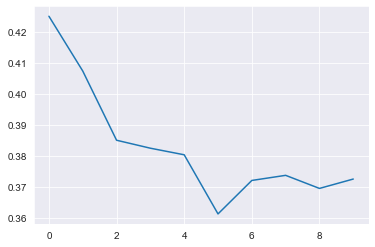

In [51]:
plt.plot(history.epoch, history.history["loss"])

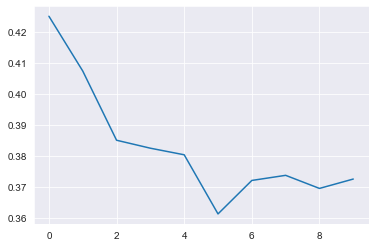

In [52]:
plt.plot(history.epoch, history.history["mse"])

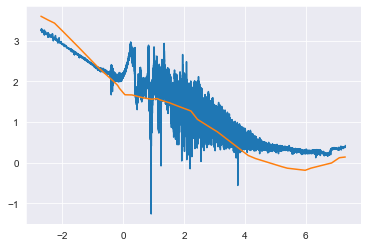

In [47]:
plt.plot(uranium_fission.Energy, uranium_fission.Data)
plt.plot(uranium_fission.Energy, model.predict(uranium_fission.drop(columns=["Data"]).values))

In [60]:
model.predict(uranium_fission.drop(columns=["Data"]))

array([[0.00026502],
       [0.00026502],
       [0.00026502],
       ...,
       [0.00026502],
       [0.00026502],
       [0.00026502]], dtype=float32)

In [ ]:
plt.plot(uranium_fission.EnergyLog, model.predict(chlorine_35.EnergyLog.values.reshape(-1, 1)))
plt.loglog(uranium_fission.Energy, uranium_fission.Data)

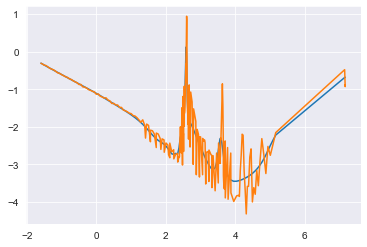

In [57]:
plt.plot(chlorine_35.EnergyLog, model.predict(chlorine_35.EnergyLog.values.reshape(-1, 1)))
plt.plot(chlorine_35.EnergyLog, chlorine_35.DataLog)

# Chlorine

In [87]:
chlorine = exfor_utils.load_exfor_element(df, 17, nat_iso="I", one_hot=False)

Extracting samples from dataframe.
EXFOR extracted DataFrame has shape:  (1744, 10)


In [89]:
chlorine.drop(
    columns=["Target_Protons", "Frame", "Target_Flag"], 
    inplace=True)

In [91]:
chlorine["EnergyLog"] = np.log10(chlorine["Energy"])
chlorine["DataLog"] = np.log10(chlorine["Data"])

In [93]:
cat_cols = ["MT"]
chlorine = pd.concat([chlorine, pd.get_dummies(chlorine[cat_cols])], axis=1).drop(columns=cat_cols)

In [95]:
chlorine = chlorine.drop(columns=["Energy", "dEnergy", "Data", "dData"])

In [101]:
chlorine

,Target_Neutrons,Target_Mass_Number,EnergyLog,DataLog,MT_1,MT_102,MT_16,MT_17,MT_2,MT_3,MT_4,MT_101,MT_103,MT_104,MT_41,MT_9000,MT_105,MT_32,MT_51,MT_33,MT_107,MT_24,MT_155,MT_158,MT_159,MT_108,MT_29,MT_1108,MT_113,MT_106,MT_22,MT_1003,MT_9001,MT_28,MT_111,MT_203,MT_2103,MT_112,MT_37,MT_161,MT_152,MT_153,MT_18,MT_160
636281,18,35,-1.602060,1.637490,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
637573,19,36,-1.602060,-3.229148,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
636539,18,35,-1.596879,-4.096910,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
636325,18,35,-1.596879,-0.310691,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
637574,19,36,-1.596879,-3.229148,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636261,18,35,7.310693,-1.483994,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
637813,20,37,7.310693,-1.954286,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
636267,18,35,7.318063,-1.628932,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
636268,18,35,7.334454,-1.638272,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [102]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(chlorine[["Target_Neutrons", "Target_Mass_Number"]])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [103]:
chlorine[["Target_Neutrons", "Target_Mass_Number"]] = scaler.transform(
    chlorine[["Target_Neutrons", "Target_Mass_Number"]])

In [104]:
chlorine

,Target_Neutrons,Target_Mass_Number,EnergyLog,DataLog,MT_1,MT_102,MT_16,MT_17,MT_2,MT_3,MT_4,MT_101,MT_103,MT_104,MT_41,MT_9000,MT_105,MT_32,MT_51,MT_33,MT_107,MT_24,MT_155,MT_158,MT_159,MT_108,MT_29,MT_1108,MT_113,MT_106,MT_22,MT_1003,MT_9001,MT_28,MT_111,MT_203,MT_2103,MT_112,MT_37,MT_161,MT_152,MT_153,MT_18,MT_160
636281,-1.382690,-1.382690,-1.602060,1.637490,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
637573,0.198563,0.198563,-1.602060,-3.229148,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
636539,-1.382690,-1.382690,-1.596879,-4.096910,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
636325,-1.382690,-1.382690,-1.596879,-0.310691,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
637574,0.198563,0.198563,-1.596879,-3.229148,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636261,-1.382690,-1.382690,7.310693,-1.483994,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
637813,1.779816,1.779816,7.310693,-1.954286,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
636267,-1.382690,-1.382690,7.318063,-1.628932,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
636268,-1.382690,-1.382690,7.334454,-1.638272,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [106]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='elu'),
    tf.keras.layers.Dense(64, activation='elu'), 
    tf.keras.layers.Dense(32, activation='elu'), 
    tf.keras.layers.Dense(16, activation='elu'), 
    tf.keras.layers.Dense(1)])

In [107]:
model.compile(optimizer = 'adam',
          loss = 'mse',
          metrics=['mse', 'mae'])

In [140]:
history = model.fit(chlorine.drop(columns=["DataLog"]).values, 
          chlorine["DataLog"].values, epochs=1000, validation_split=0.2)

Train on 1395 samples, validate on 349 samples
Epoch 1/1000
1395/1395 [==============================] - 0s 259us/sample - loss: 0.1563 - mse: 0.1563 - mae: 0.2760 - val_loss: 0.0605 - val_mse: 0.0605 - val_mae: 0.1767
Epoch 2/1000
1395/1395 [==============================] - 0s 130us/sample - loss: 0.1586 - mse: 0.1586 - mae: 0.2817 - val_loss: 0.0790 - val_mse: 0.0790 - val_mae: 0.1914
Epoch 3/1000
1395/1395 [==============================] - 0s 130us/sample - loss: 0.1546 - mse: 0.1546 - mae: 0.2808 - val_loss: 0.0765 - val_mse: 0.0765 - val_mae: 0.1874
Epoch 4/1000
1395/1395 [==============================] - 0s 128us/sample - loss: 0.1413 - mse: 0.1413 - mae: 0.2672 - val_loss: 0.0578 - val_mse: 0.0578 - val_mae: 0.1658
Epoch 5/1000
1395/1395 [==============================] - 0s 131us/sample - loss: 0.1395 - mse: 0.1395 - mae: 0.2646 - val_loss: 0.0599 - val_mse: 0.0599 - val_mae: 0.1743
Epoch 6/1000
1395/1395 [==============================] - 0s 129us/sample - loss: 0.1761 - ms

1395/1395 [==============================] - 0s 165us/sample - loss: 0.1480 - mse: 0.1480 - mae: 0.2757 - val_loss: 0.1348 - val_mse: 0.1348 - val_mae: 0.2570
Epoch 96/1000
1395/1395 [==============================] - 0s 142us/sample - loss: 0.1410 - mse: 0.1410 - mae: 0.2676 - val_loss: 0.1659 - val_mse: 0.1659 - val_mae: 0.2749
Epoch 97/1000
1395/1395 [==============================] - 0s 161us/sample - loss: 0.1586 - mse: 0.1586 - mae: 0.2752 - val_loss: 0.1783 - val_mse: 0.1783 - val_mae: 0.3069
Epoch 98/1000
1395/1395 [==============================] - 0s 143us/sample - loss: 0.1585 - mse: 0.1585 - mae: 0.2815 - val_loss: 0.0918 - val_mse: 0.0918 - val_mae: 0.2189
Epoch 99/1000
1395/1395 [==============================] - 0s 146us/sample - loss: 0.1366 - mse: 0.1366 - mae: 0.2653 - val_loss: 0.1634 - val_mse: 0.1634 - val_mae: 0.2879
Epoch 100/1000
1395/1395 [==============================] - 0s 152us/sample - loss: 0.1356 - mse: 0.1356 - mae: 0.2578 - val_loss: 0.1309 - val_mse: 

1395/1395 [==============================] - 0s 151us/sample - loss: 0.1357 - mse: 0.1357 - mae: 0.2614 - val_loss: 0.2634 - val_mse: 0.2634 - val_mae: 0.3825
Epoch 190/1000
1395/1395 [==============================] - 0s 137us/sample - loss: 0.1642 - mse: 0.1642 - mae: 0.2830 - val_loss: 0.1797 - val_mse: 0.1797 - val_mae: 0.2999
Epoch 191/1000
1395/1395 [==============================] - 0s 137us/sample - loss: 0.1369 - mse: 0.1369 - mae: 0.2642 - val_loss: 0.2536 - val_mse: 0.2536 - val_mae: 0.3504
Epoch 192/1000
1395/1395 [==============================] - 0s 134us/sample - loss: 0.1325 - mse: 0.1325 - mae: 0.2538 - val_loss: 0.1919 - val_mse: 0.1919 - val_mae: 0.3048
Epoch 193/1000
1395/1395 [==============================] - 0s 137us/sample - loss: 0.1464 - mse: 0.1464 - mae: 0.2718 - val_loss: 0.2494 - val_mse: 0.2494 - val_mae: 0.3342
Epoch 194/1000
1395/1395 [==============================] - 0s 139us/sample - loss: 0.1443 - mse: 0.1443 - mae: 0.2691 - val_loss: 0.1639 - val_m

1395/1395 [==============================] - 0s 152us/sample - loss: 0.1501 - mse: 0.1501 - mae: 0.2715 - val_loss: 0.2680 - val_mse: 0.2680 - val_mae: 0.3745
Epoch 284/1000
1395/1395 [==============================] - 0s 139us/sample - loss: 0.1784 - mse: 0.1784 - mae: 0.2939 - val_loss: 0.3151 - val_mse: 0.3151 - val_mae: 0.3792
Epoch 285/1000
1395/1395 [==============================] - 0s 135us/sample - loss: 0.1479 - mse: 0.1479 - mae: 0.2706 - val_loss: 0.2495 - val_mse: 0.2495 - val_mae: 0.3424
Epoch 286/1000
1395/1395 [==============================] - 0s 166us/sample - loss: 0.1299 - mse: 0.1299 - mae: 0.2561 - val_loss: 0.2745 - val_mse: 0.2745 - val_mae: 0.3770
Epoch 287/1000
1395/1395 [==============================] - 0s 158us/sample - loss: 0.1373 - mse: 0.1373 - mae: 0.2573 - val_loss: 0.3254 - val_mse: 0.3254 - val_mae: 0.4029
Epoch 288/1000
1395/1395 [==============================] - 0s 140us/sample - loss: 0.1821 - mse: 0.1821 - mae: 0.2959 - val_loss: 0.2226 - val_m

1395/1395 [==============================] - 0s 133us/sample - loss: 0.1548 - mse: 0.1548 - mae: 0.2721 - val_loss: 0.3044 - val_mse: 0.3044 - val_mae: 0.3850
Epoch 378/1000
1395/1395 [==============================] - 0s 134us/sample - loss: 0.1362 - mse: 0.1362 - mae: 0.2622 - val_loss: 0.3446 - val_mse: 0.3446 - val_mae: 0.3967
Epoch 379/1000
1395/1395 [==============================] - 0s 135us/sample - loss: 0.1577 - mse: 0.1577 - mae: 0.2774 - val_loss: 0.3407 - val_mse: 0.3407 - val_mae: 0.3987
Epoch 380/1000
1395/1395 [==============================] - 0s 134us/sample - loss: 0.2111 - mse: 0.2111 - mae: 0.3118 - val_loss: 0.3544 - val_mse: 0.3544 - val_mae: 0.4199
Epoch 381/1000
1395/1395 [==============================] - 0s 134us/sample - loss: 0.2402 - mse: 0.2402 - mae: 0.3381 - val_loss: 0.4730 - val_mse: 0.4730 - val_mae: 0.5331
Epoch 382/1000
1395/1395 [==============================] - 0s 136us/sample - loss: 0.1745 - mse: 0.1745 - mae: 0.2942 - val_loss: 0.2912 - val_m

1395/1395 [==============================] - 0s 135us/sample - loss: 0.1450 - mse: 0.1450 - mae: 0.2714 - val_loss: 0.4295 - val_mse: 0.4295 - val_mae: 0.4601
Epoch 472/1000
1395/1395 [==============================] - 0s 133us/sample - loss: 0.1343 - mse: 0.1343 - mae: 0.2595 - val_loss: 0.3105 - val_mse: 0.3105 - val_mae: 0.3703
Epoch 473/1000
1395/1395 [==============================] - 0s 132us/sample - loss: 0.1458 - mse: 0.1458 - mae: 0.2707 - val_loss: 0.3875 - val_mse: 0.3875 - val_mae: 0.4380
Epoch 474/1000
1395/1395 [==============================] - 0s 133us/sample - loss: 0.1602 - mse: 0.1602 - mae: 0.2773 - val_loss: 0.4254 - val_mse: 0.4254 - val_mae: 0.4644
Epoch 475/1000
1395/1395 [==============================] - 0s 134us/sample - loss: 0.1628 - mse: 0.1628 - mae: 0.2828 - val_loss: 0.4449 - val_mse: 0.4449 - val_mae: 0.4636
Epoch 476/1000
1395/1395 [==============================] - 0s 133us/sample - loss: 0.1736 - mse: 0.1736 - mae: 0.2902 - val_loss: 0.3088 - val_m

1395/1395 [==============================] - 0s 136us/sample - loss: 0.1720 - mse: 0.1720 - mae: 0.2937 - val_loss: 0.3786 - val_mse: 0.3786 - val_mae: 0.4183
Epoch 566/1000
1395/1395 [==============================] - 0s 134us/sample - loss: 0.1549 - mse: 0.1549 - mae: 0.2794 - val_loss: 0.4194 - val_mse: 0.4194 - val_mae: 0.4480
Epoch 567/1000
1395/1395 [==============================] - 0s 134us/sample - loss: 0.1356 - mse: 0.1356 - mae: 0.2579 - val_loss: 0.4108 - val_mse: 0.4108 - val_mae: 0.4330
Epoch 568/1000
1395/1395 [==============================] - 0s 132us/sample - loss: 0.1843 - mse: 0.1843 - mae: 0.2948 - val_loss: 0.4174 - val_mse: 0.4174 - val_mae: 0.4540
Epoch 569/1000
1395/1395 [==============================] - 0s 132us/sample - loss: 0.1631 - mse: 0.1631 - mae: 0.2831 - val_loss: 0.3219 - val_mse: 0.3219 - val_mae: 0.3829
Epoch 570/1000
1395/1395 [==============================] - 0s 132us/sample - loss: 0.1528 - mse: 0.1528 - mae: 0.2796 - val_loss: 0.4159 - val_m

1395/1395 [==============================] - 0s 135us/sample - loss: 0.1749 - mse: 0.1749 - mae: 0.2904 - val_loss: 0.4543 - val_mse: 0.4543 - val_mae: 0.4755
Epoch 660/1000
1395/1395 [==============================] - 0s 132us/sample - loss: 0.1465 - mse: 0.1465 - mae: 0.2683 - val_loss: 0.2698 - val_mse: 0.2698 - val_mae: 0.3501
Epoch 661/1000
1395/1395 [==============================] - 0s 134us/sample - loss: 0.1318 - mse: 0.1318 - mae: 0.2516 - val_loss: 0.2395 - val_mse: 0.2395 - val_mae: 0.3792
Epoch 662/1000
1395/1395 [==============================] - 0s 132us/sample - loss: 0.1295 - mse: 0.1295 - mae: 0.2559 - val_loss: 0.2609 - val_mse: 0.2609 - val_mae: 0.3379
Epoch 663/1000
1395/1395 [==============================] - 0s 134us/sample - loss: 0.1269 - mse: 0.1269 - mae: 0.2513 - val_loss: 0.2635 - val_mse: 0.2635 - val_mae: 0.3483
Epoch 664/1000
1395/1395 [==============================] - 0s 132us/sample - loss: 0.1518 - mse: 0.1518 - mae: 0.2689 - val_loss: 0.2339 - val_m

1395/1395 [==============================] - 0s 135us/sample - loss: 0.1603 - mse: 0.1603 - mae: 0.2797 - val_loss: 0.2391 - val_mse: 0.2391 - val_mae: 0.3479
Epoch 754/1000
1395/1395 [==============================] - 0s 133us/sample - loss: 0.2062 - mse: 0.2062 - mae: 0.3172 - val_loss: 0.4110 - val_mse: 0.4110 - val_mae: 0.4596
Epoch 755/1000
1395/1395 [==============================] - 0s 134us/sample - loss: 0.1635 - mse: 0.1635 - mae: 0.2818 - val_loss: 0.3679 - val_mse: 0.3679 - val_mae: 0.4340
Epoch 756/1000
1395/1395 [==============================] - 0s 133us/sample - loss: 0.1473 - mse: 0.1473 - mae: 0.2702 - val_loss: 0.3286 - val_mse: 0.3286 - val_mae: 0.3951
Epoch 757/1000
1395/1395 [==============================] - 0s 135us/sample - loss: 0.1497 - mse: 0.1497 - mae: 0.2685 - val_loss: 0.3310 - val_mse: 0.3310 - val_mae: 0.3968
Epoch 758/1000
1395/1395 [==============================] - 0s 134us/sample - loss: 0.1454 - mse: 0.1454 - mae: 0.2685 - val_loss: 0.4367 - val_m

1395/1395 [==============================] - 0s 137us/sample - loss: 0.1296 - mse: 0.1296 - mae: 0.2532 - val_loss: 0.3352 - val_mse: 0.3352 - val_mae: 0.4079
Epoch 848/1000
1395/1395 [==============================] - 0s 136us/sample - loss: 0.1357 - mse: 0.1357 - mae: 0.2608 - val_loss: 0.3724 - val_mse: 0.3724 - val_mae: 0.4448
Epoch 849/1000
1395/1395 [==============================] - 0s 137us/sample - loss: 0.1458 - mse: 0.1458 - mae: 0.2659 - val_loss: 0.3852 - val_mse: 0.3852 - val_mae: 0.4501
Epoch 850/1000
1395/1395 [==============================] - 0s 137us/sample - loss: 0.1319 - mse: 0.1319 - mae: 0.2578 - val_loss: 0.2970 - val_mse: 0.2970 - val_mae: 0.3808
Epoch 851/1000
1395/1395 [==============================] - 0s 137us/sample - loss: 0.1385 - mse: 0.1385 - mae: 0.2599 - val_loss: 0.4987 - val_mse: 0.4987 - val_mae: 0.5419
Epoch 852/1000
1395/1395 [==============================] - 0s 136us/sample - loss: 0.1703 - mse: 0.1703 - mae: 0.2890 - val_loss: 0.5484 - val_m

1395/1395 [==============================] - 0s 138us/sample - loss: 0.1519 - mse: 0.1519 - mae: 0.2759 - val_loss: 0.4018 - val_mse: 0.4018 - val_mae: 0.4499
Epoch 942/1000
1395/1395 [==============================] - 0s 135us/sample - loss: 0.1676 - mse: 0.1676 - mae: 0.2854 - val_loss: 0.3343 - val_mse: 0.3343 - val_mae: 0.4030
Epoch 943/1000
1395/1395 [==============================] - 0s 136us/sample - loss: 0.1407 - mse: 0.1407 - mae: 0.2698 - val_loss: 0.4699 - val_mse: 0.4699 - val_mae: 0.5047
Epoch 944/1000
1395/1395 [==============================] - 0s 136us/sample - loss: 0.1466 - mse: 0.1466 - mae: 0.2661 - val_loss: 0.4152 - val_mse: 0.4152 - val_mae: 0.4602
Epoch 945/1000
1395/1395 [==============================] - 0s 135us/sample - loss: 0.1332 - mse: 0.1332 - mae: 0.2603 - val_loss: 0.6045 - val_mse: 0.6045 - val_mae: 0.5785
Epoch 946/1000
1395/1395 [==============================] - 0s 134us/sample - loss: 0.1426 - mse: 0.1426 - mae: 0.2637 - val_loss: 0.4132 - val_m

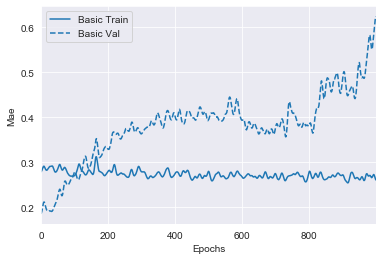

In [141]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "mae")
# plt.ylim([0, 10])
# plt.ylabel('MAE [MPG]')

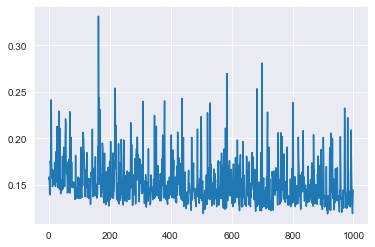

In [142]:
plt.plot(history.epoch, history.history["loss"])

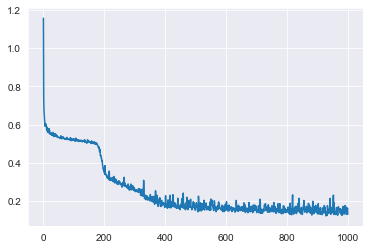

In [110]:
plt.plot(history.epoch, history.history["loss"])

In [111]:
chlorine

,Target_Neutrons,Target_Mass_Number,EnergyLog,DataLog,MT_1,MT_102,MT_16,MT_17,MT_2,MT_3,MT_4,MT_101,MT_103,MT_104,MT_41,MT_9000,MT_105,MT_32,MT_51,MT_33,MT_107,MT_24,MT_155,MT_158,MT_159,MT_108,MT_29,MT_1108,MT_113,MT_106,MT_22,MT_1003,MT_9001,MT_28,MT_111,MT_203,MT_2103,MT_112,MT_37,MT_161,MT_152,MT_153,MT_18,MT_160
636281,-1.382690,-1.382690,-1.602060,1.637490,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
637573,0.198563,0.198563,-1.602060,-3.229148,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
636539,-1.382690,-1.382690,-1.596879,-4.096910,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
636325,-1.382690,-1.382690,-1.596879,-0.310691,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
637574,0.198563,0.198563,-1.596879,-3.229148,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636261,-1.382690,-1.382690,7.310693,-1.483994,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
637813,1.779816,1.779816,7.310693,-1.954286,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
636267,-1.382690,-1.382690,7.318063,-1.628932,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
636268,-1.382690,-1.382690,7.334454,-1.638272,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [123]:
scaler.transform(pd.DataFrame({"Target_Neutrons":[18], "Target_Mass_Number":[35]}))

array([[-2.96394235, -1.38268954]])

In [130]:
neutron_18 = scaler.transform(pd.DataFrame({"Target_Neutrons":[18], "Target_Mass_Number":[35]}))[0][0]
mass_number_35 = scaler.transform(pd.DataFrame({"Target_Neutrons":[18], "Target_Mass_Number":[35]}))[0][1]

In [132]:
to_query = chlorine[(chlorine["MT_103"] == 1) & (chlorine["Target_Neutrons"] == neutron_18)].drop(
    columns=["DataLog"])

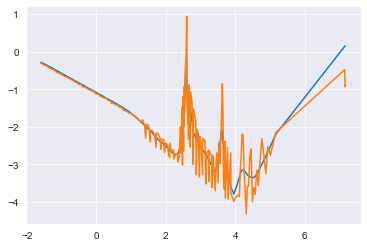

In [143]:
plt.plot(to_query.EnergyLog, model.predict(to_query))
plt.plot(chlorine_35.EnergyLog, chlorine_35.DataLog)

In [151]:
to_query_1 = chlorine[(chlorine["MT_102"] == 1) & (chlorine["Target_Neutrons"] == neutron_18)]

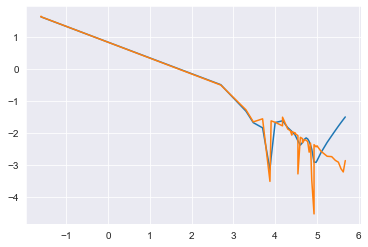

In [153]:
plt.plot(to_query_1.EnergyLog, model.predict(to_query_1.drop(
    columns=["DataLog"])))
plt.plot(to_query_1.EnergyLog, to_query_1.DataLog)

# Reading Flux

In [157]:
from scipy.io import loadmat

In [158]:
x = loadmat('MCFR_detector.mat')

/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/scipy/io/matlab/mio.py:218: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


In [161]:
x.keys()

dict_keys(['__header__', '__version__', '__globals__', 'DETEnergyDetector', 'DETEnergyDetectorE', 'None', '__function_workspace__'])

In [163]:
x["DETEnergyDetector"].shape

(500, 12)

In [185]:
x["DETEnergyDetector"][:,11].shape

(500,)

In [191]:
x["DETEnergyDetectorE"].shape

(500, 3)

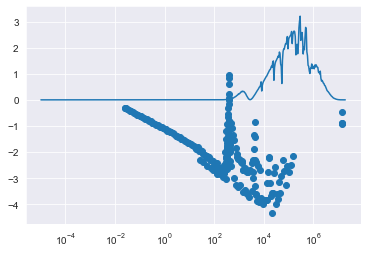

In [201]:
plt.plot(x["DETEnergyDetectorE"][:,2]*1E6, x["DETEnergyDetector"][:,10])
plt.xscale('log')
plt.scatter(chlorine_35.Energy, chlorine_35.DataLog)

In [226]:
fig_dir = "../Figures/"

In [228]:
sns.set(font_scale=2) 

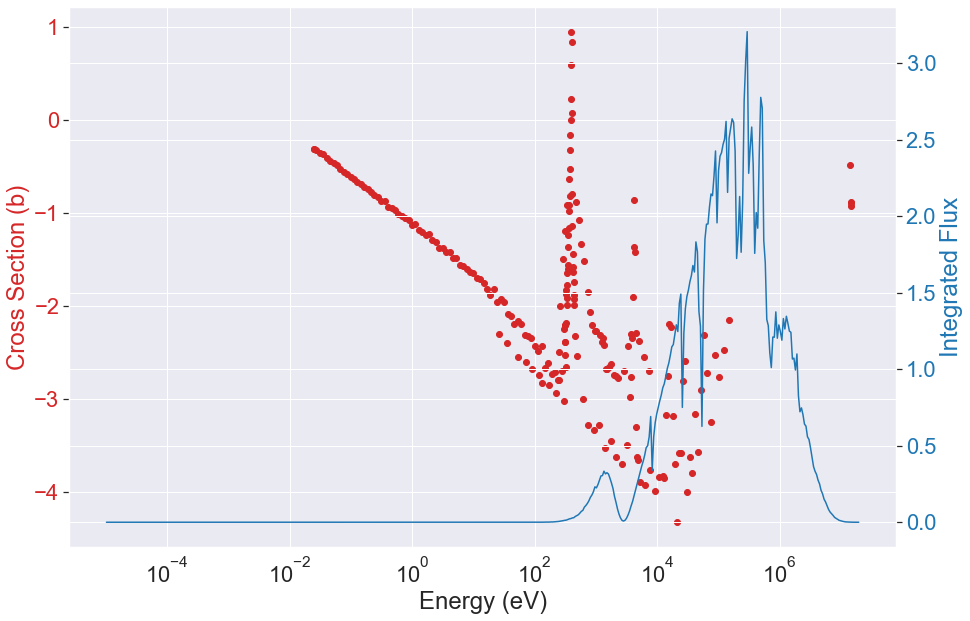

In [229]:
# Create some mock data
fig, ax1 = plt.subplots(figsize=(14,9))

color = 'tab:red'
ax1.set_xlabel('Energy (eV)')
ax1.set_ylabel('Cross Section (b)', color=color)
ax1.scatter(chlorine_35.Energy, chlorine_35.DataLog, color=color, label="Cl-35")
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Integrated Flux', color=color)  # we already handled the x-label with ax1
ax2.plot(x["DETEnergyDetectorE"][:,2]*1E6, x["DETEnergyDetector"][:,10], color=color, label="MCFR")
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.xscale('log')
plt.savefig(fig_dir + "MCFR_Flux_Cl_XS.svg")
plt.show()

In [230]:
# Loading LBNL new chlorine measurments
new_data = endf_utils.load_new("../EXFOR/New_Data/Chlorine_Data/new_cl_np.csv")

../EXFOR/New_Data/Chlorine_Data/new_cl_np.csv
Finish reading ENDF data with shape:  (12, 4)


In [234]:
# load_endf() extracts ENDF data from ML_Data directory
endf_cl = nuc_data.load_endf("Cl035", "MT103", mev_to_ev=False, mb_to_b=False)

/Users/pedrovicentevaldez/Desktop/ML_Nuclear_Data/ML_Data/ENDF_neutrons/Cl035/endfb8.0/tables/xs/n-Cl035-MT103.endfb8.0
Finish reading ENDF data with shape:  (8791, 2)


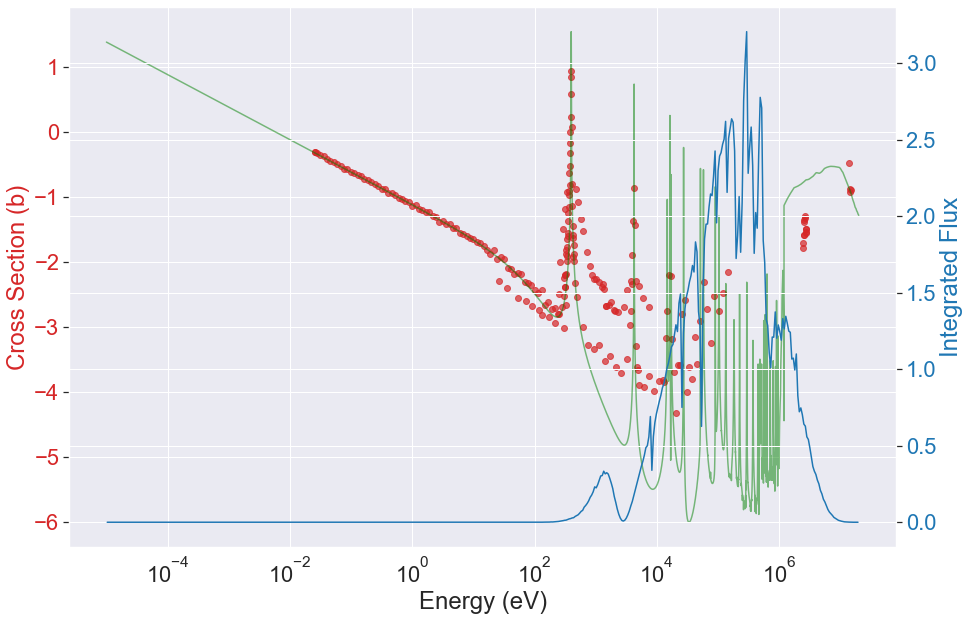

In [239]:
# Create some mock data
fig, ax1 = plt.subplots(figsize=(14,9))

color = 'tab:red'
ax1.set_xlabel('Energy (eV)')
ax1.set_ylabel('Cross Section (b)', color=color)
ax1.scatter(chlorine_35.Energy, chlorine_35.DataLog, color=color, label="Cl-35", alpha=0.7)
ax1.scatter(new_data.Energy, np.log10(new_data.Data), color=color, alpha=0.7)
ax1.plot(endf_cl.Energy, np.log10(endf_cl.Data), color='green', alpha=0.5)
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Integrated Flux', color=color)  # we already handled the x-label with ax1
ax2.plot(x["DETEnergyDetectorE"][:,2]*1E6, x["DETEnergyDetector"][:,10], color=color, label="MCFR")
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.xscale('log')
plt.savefig(fig_dir + "MCFR_Flux_Cl_XS.svg")
plt.show()